<a href="https://colab.research.google.com/github/rogargon/XAI-KG/blob/main/XAIKG_Tutorial_(pyRDF2Vec_%2B_RDFLime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading the data
!wget https://raw.githubusercontent.com/rgrenz/rdflime-util/main/data/metacritic-movies/data_fixed.tsv

--2022-09-05 20:14:53--  https://raw.githubusercontent.com/rgrenz/rdflime-util/main/data/metacritic-movies/data_fixed.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684478 (668K) [text/plain]
Saving to: ‘data_fixed.tsv’

data_fixed.tsv      100%[===================>] 668.44K  --.-KB/s    in 0.007s  

2022-09-05 20:14:55 (99.6 MB/s) - ‘data_fixed.tsv’ saved [684478/684478]



In [2]:
!pip install pyrdf2vec
!pip install rdflib
!pip install SPARQLWrapper
!pip install adjustText
!pip install nest_asyncio
!pip install mpld3
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 11.2 MB 55.8 MB/s 
     |████████████████████████████████| 204 kB 64.6 MB/s 
     |████████████████████████████████| 60 kB 8.9 MB/s 
     |████████████████████████████████| 957 kB 54.4 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149861 sha256=4861077e5c679b7bc69d2ae16984d7fde1ba595c6389e6681d159c9a2654e172
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9413 sha256=f8aeb665043afdaa925a98acaeae5e247a42ded8186277fb3b74942b0a97fc23
  Stored in directory: /root/.cache/pip/wheels/c7/4c/ef/427db8777620f7fa12a6404f1527a39536a812f46a4d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 33.7 MB/s 
     |████████████████████████████████| 41 kB 825 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=079bbe0f768a62b67039fdf617b0dcd34b0f1f05121fc48f3dbe13dbed73c99d
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 28.9 MB/s 
Reading package lists... Done
Building 

In [3]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

In [4]:
dataset = pd.read_csv('data_fixed.tsv', sep="\t", nrows=400)
entities = list(dict.fromkeys(
        [row['DBpedia_URI16'] for _, row in dataset.iterrows()]))  # Remove duplicates, keep order

In [5]:
len(entities)

400

In [ ]:
# Uncomment to regenerate embeddings (very time consuming)

# dbpedia = KG('https://dbpedia.org/sparql', skip_verify=False, mul_req=False, is_remote=True)
# transformer = RDF2VecTransformer(Word2Vec(), verbose=1,
#             walkers=[RandomWalker(max_walks=10, max_depth=3, with_reverse=False, md5_bytes=None, n_jobs=1)])
#
# walks = transformer.get_walks(dbpedia, entities)
# transformer.fit(walks)
# embeddings, literals = transformer.transform(dbpedia, entities)
# transformer.save('rdf2vec_transformer')

# Load pregenerated embeddings for DBPedia films

!wget https://github.com/rogargon/XAI-KG/raw/main/rdf2vec_transformer
import pickle
with open('rdf2vec_transformer', 'rb') as file:
    transformer = pickle.load(file)

--2022-09-05 13:44:54--  https://github.com/rogargon/XAI-KG/raw/main/rdf2vec_transformer
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rogargon/XAI-KG/main/rdf2vec_transformer [following]
--2022-09-05 13:44:54--  https://raw.githubusercontent.com/rogargon/XAI-KG/main/rdf2vec_transformer
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5880674 (5.6M) [application/octet-stream]
Saving to: ‘rdf2vec_transformer’

rdf2vec_transformer 100%[===================>]   5.61M  --.-KB/s    in 0.06s   

2022-09-05 13:44:54 (99.5 MB/s) - ‘rdf2vec_transformer’ saved [5880674/5880674]



In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

train, test = train_test_split(dataset, test_size=0.2)

transformer = RDF2VecTransformer.load('rdf2vec_transformer')
clf = SVC(C=100, probability=True)

# Train classifier
train_embeddings = [transformer._embeddings[transformer._entities.index(uri)] for uri in train['DBpedia_URI16']]
train_targets = train['label']
clf.fit(train_embeddings, train_targets)

# Test classifier
test_embeddings = [transformer._embeddings[transformer._entities.index(uri)] for uri in test['DBpedia_URI16']]
test_targets = test['label']
pred = clf.predict(test_embeddings)
score = accuracy_score(test_targets, pred)
print(score)

0.4875


In [17]:
!git clone https://github.com/rgrenz/rdflime-core

Cloning into 'rdflime-core'...
remote: Enumerating objects: 2465, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 2465 (delta 27), reused 39 (delta 27), pack-reused 2425
Receiving objects: 100% (2465/2465), 21.43 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (1651/1651), done.


In [18]:
!pip install rdflime-core/.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./rdflime-core
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=565373 sha256=8bed7df8e6e8bfe8a876189821e9ed7d1bc78eaeee1b10bcfd7867c58e9da97c
  Stored in directory: /root/.cache/pip/wheels/c3/9b/a0/386a4158a41cb98804e063dec008506453c233e40d6698ad2f
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=d5fef3eea879

In [19]:
from importlib import reload
from lime.lime_rdf import LimeRdfExplainer

explainer = LimeRdfExplainer(
    transformer=transformer, 
    entities=entities,
    class_names=clf.classes_,
    kernel=None,
    kernel_width=25,
    verbose=False,
    feature_selection="auto"
)

explained_idx = 1
explained_entity_row = dataset.loc[explained_idx]
explained_entity_uri = explained_entity_row['DBpedia_URI16']
embedding = transformer._embeddings[transformer._entities.index(explained_entity_uri)]
prediction = clf.predict_proba([embedding])

print("Explaining", explained_entity_uri)
print("Original prediction:", prediction, " / ".join(clf.classes_))
print("True class:", explained_entity_row['label'])

data, probabilities, distances, explanation = explainer.explain_instance(
    entity=explained_entity_uri, 
    classifier_fn=clf.predict_proba,
    num_features=10,
    num_samples=50,
    allow_triple_addition=False,
    allow_triple_subtraction=True,
    max_changed_triples=5,
    change_count_fixed=True,
    use_w2v_freeze=False,
    center_correction=False,
    single_run=False,
    train_with_all=False,
    distance_metric="cosine",
    model_regressor=None,
    short_uris=False,
    labels=(0,1)
)

Explaining http://dbpedia.org/resource/Ratatouille_(film)
Original prediction: [[0.48435983 0.51564017]] bad / good
True class: good


Preparing perturbed walks: 100%|██████████| 50/50 [00:00<00:00, 3771.79it/s]


Average remaining walks per artificial entity (from 484): 5.32


Training perturbed W2V embeddings: 100%|██████████| 50/50 [00:03<00:00, 14.24it/s]

Got data, labels, and distances


In [20]:
explanation.as_list(label=1)

[(("http://dbpedia.org/resource/Category:Children's_fantasy_films",
   'http://www.w3.org/1999/02/22-rdf-syntax-ns#type',
   'http://www.w3.org/2004/02/skos/core#Concept'),
  4.076387495610434e-05),
 (('http://dbpedia.org/resource/Ratatouille_(film)',
   'http://purl.org/dc/terms/subject',
   'http://dbpedia.org/resource/Category:2000s_fantasy_films'),
  2.6766997095096865e-05),
 (('http://www.w3.org/2004/02/skos/core#Concept',
   'http://www.w3.org/1999/02/22-rdf-syntax-ns#type',
   'http://www.w3.org/2002/07/owl#Class'),
  -2.2267368175941454e-05),
 (('http://dbpedia.org/resource/Category:Best_Animated_Feature_Film_Golden_Globe_winners',
   'http://www.w3.org/2004/02/skos/core#broader',
   'http://dbpedia.org/resource/Category:Awards_for_best_animated_feature_film'),
  1.6487373283347283e-05),
 (('http://dbpedia.org/resource/Ratatouille_(film)',
   'http://purl.org/dc/terms/subject',
   'http://dbpedia.org/resource/Category:Cooking_films'),
  -1.6365614391036558e-05),
 (('http://dbpe

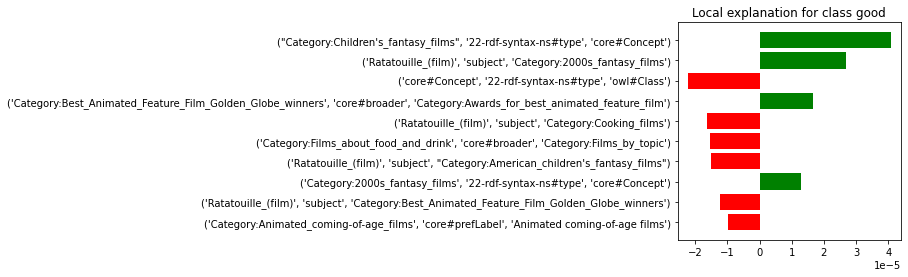

In [21]:
label = 1

figsize = (4, .4*len(explanation.as_list(label=label)))

explanation.domain_mapper.short_uris=True
fig = explanation.as_pyplot_figure(figsize=figsize, label=label)

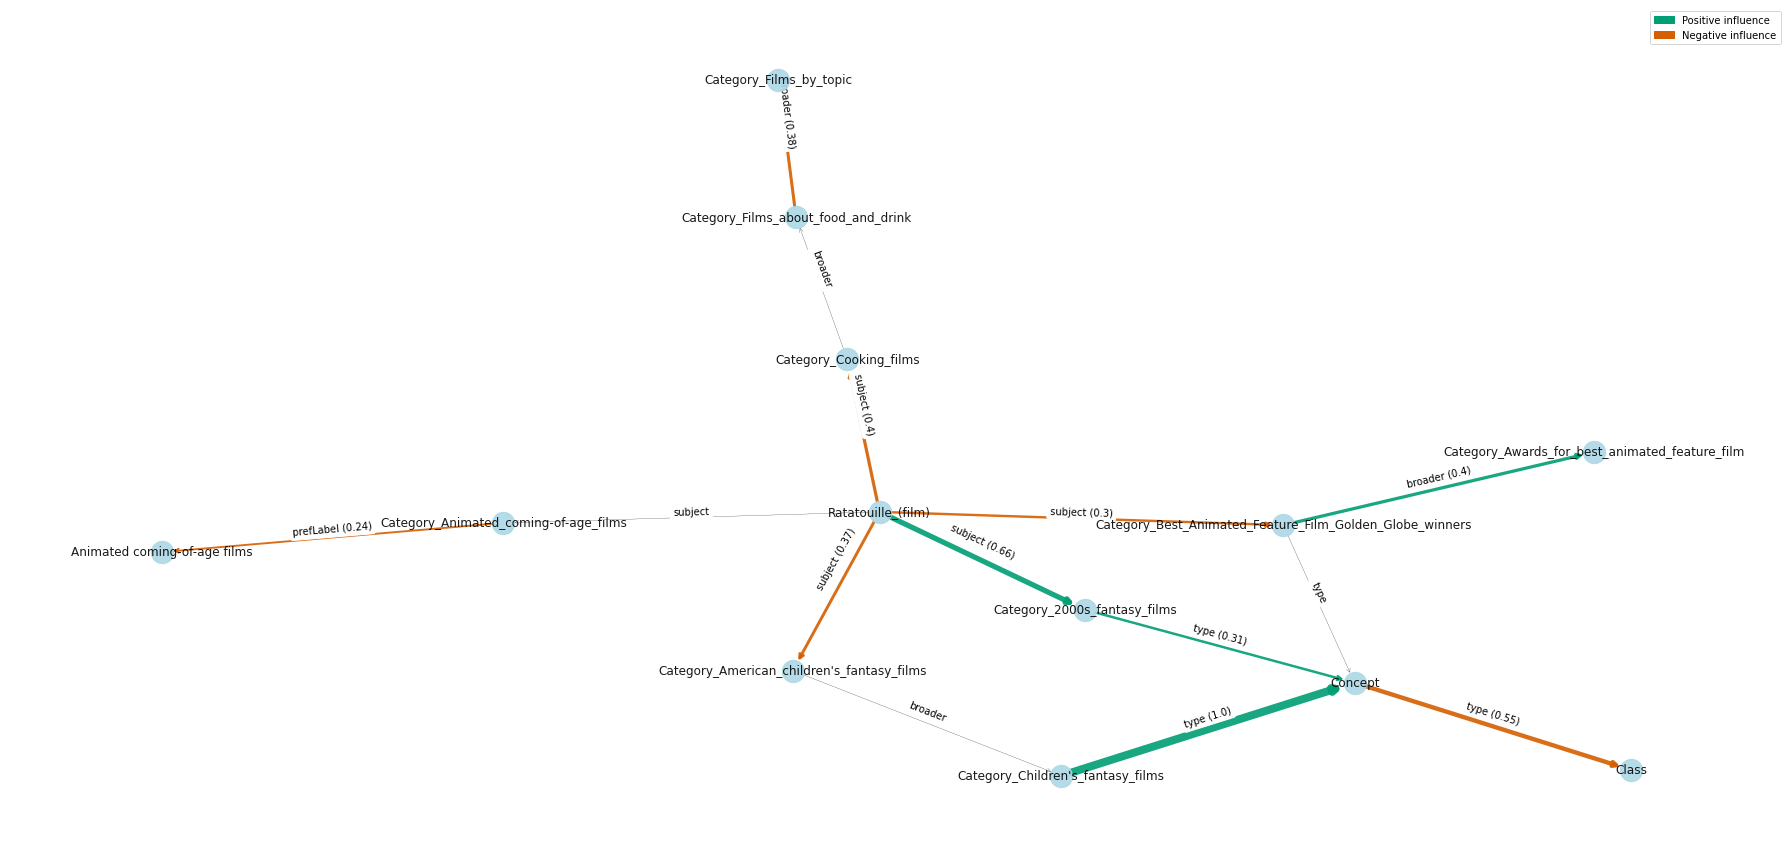

In [22]:
explanation.domain_mapper.short_uris=True
with open("test.html", "w") as f:
    f.write(explanation.as_html())
    explanation.domain_mapper.short_uris=False
iw = explainer.indexed_walks

top_triples = explanation.as_list()[:15]

relevant_walks = []
for triple in top_triples:
    for w in iw.walks(explained_entity_uri, tuple(triple[0])):
        
        entity_pos = w.index(explained_entity_uri)

        for i in range(2, len(w)):
            if w[i-2]== triple[0][0] and w[i-1] == triple[0][1] and w[i] == triple[0][2]:
                triple_start_pos = i-2
                triple_end_pos = i
        
        from_pos = min(entity_pos, triple_start_pos)
        to_pos = max(entity_pos, triple_end_pos)

        relevant_walks.append(w[from_pos:to_pos+1])



relevant_triples = iw.walks_as_triples(relevant_walks)

edges = []
labels = {}

COLOR_POSITIVE = "#009E73"
COLOR_NEGATIVE = "#D55E00"
COLOR_NEUTRAL = "#000000"

min_edge_width = 0.25
max_edge_width = 8
max_score = max([abs(exp[1]) for exp in top_triples])

uri_trimmer = lambda uri: uri.split("/")[-1].split("#")[-1].replace(":", "_")
triple_trimmer = lambda triple: (uri_trimmer(triple[0]), uri_trimmer(triple[1]), uri_trimmer(triple[2]))

for rt in relevant_triples:
    score = next((exp[1] for exp in top_triples if rt==exp[0]), None)
    
    if score:
        # score *= -1
        color =  COLOR_POSITIVE if score > 0 else COLOR_NEGATIVE
        width = max(abs(score)/max_score*max_edge_width, min_edge_width)
    else:
        color = COLOR_NEUTRAL
        width = min_edge_width
        #print(rt, score)

    rt = triple_trimmer(rt)
    edge = (rt[0], rt[2], {"width": width, "color": color})

    if edge[0] == edge[1]:
        continue # Due to bug in mpld3 HTTP export
    
    label = rt[1]
    if score: label += f" ({round(width/max_edge_width, 2)})"

    edges.append(edge)
    
    labels[(edge[0],edge[1])] = label

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
from math import sqrt
import mpld3

f = plt.figure(figsize=(25,12))
positive_patch = mpatches.Patch(color=COLOR_POSITIVE, label='Positive influence')
negative_patch = mpatches.Patch(color=COLOR_NEGATIVE, label='Negative influence')
plt.legend(handles=[positive_patch, negative_patch])
plt.axis("off")

G = nx.DiGraph()
G.add_edges_from(edges)
# pos = nx.spring_layout(G, k=1.25/sqrt(len(G.nodes())), seed=42, iterations=35)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")

nx.draw(
    G, pos,
    node_size=500, node_color='lightblue', alpha=0.9,
    labels={node: node for node in G.nodes()},
    arrowstyle='->',
    width=[G[u][v]['width'] for u,v in G.edges()],
    edge_color=[G[u][v]['color'] for u,v in G.edges()],
   # style=[":" if G[u][v]['color'] == COLOR_NEGATIVE else "-" for u,v in G.edges()]
)


_ = nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=labels,
    font_color='black',
    verticalalignment="bottom",
    bbox={"boxstyle":'round', "ec":(1.0, 1.0, 1.0), "fc":(1.0, 1.0, 1.0)}
)

f.tight_layout()
plt.savefig("test.svg")
mpld3.plugins.clear(f)
mpld3.plugins.connect(f, mpld3.plugins.Reset(), mpld3.plugins.Zoom(button=True, enabled=True))
mpld3.save_html(f, "test.html")